In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import slic, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float


In [2]:
img = img_as_float(astronaut()[::2, ::2])


SLIC number of segments:196
watershed number of segments:256


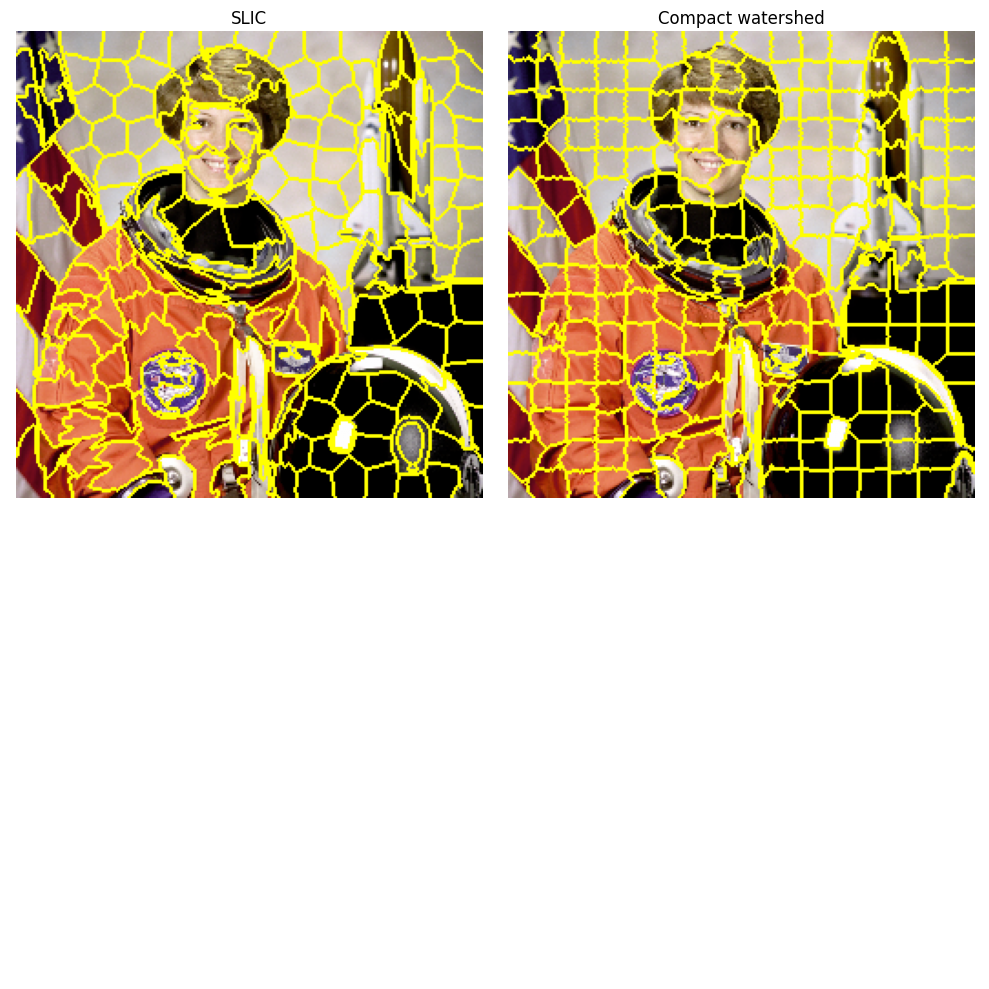

In [5]:
#call SLIC, with segment compactness = 10
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)
gradient = sobel(rgb2gray(img))
#call watershed with segment compactness = 0.1
segments_watershed = watershed(gradient, markers=250, compactness=0.01)
#count the number of segments
print('SLIC number of segments:{}'.format(len(np.unique(segments_slic))))
print('watershed number of segments:{}'.format(len(np.unique(segments_watershed))))
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True,
sharey=True)
ax[0, 0].imshow(mark_boundaries(img, segments_slic))
ax[0, 0].set_title('SLIC')
ax[0, 1].imshow(mark_boundaries(img, segments_watershed))
ax[0, 1].set_title('Compact watershed')
for a in ax.ravel():
    a.set_axis_off()
plt.tight_layout()
plt.show()

In [6]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt


(1280, 1280, 4)


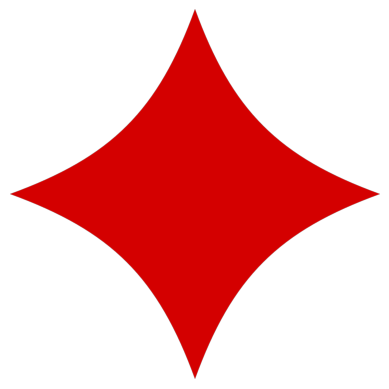

In [9]:
img = imread('diamond.webp')
plt.axis("off")
plt.imshow(img)
print(img.shape)

(512, 256, 4)


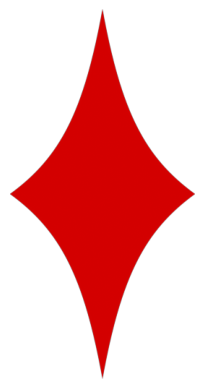

In [10]:
resized_img = resize(img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

<ipython-input-11-06acf1ec875b>:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8,


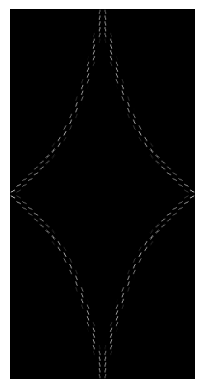

In [11]:
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8,
8),
cells_per_block=(2, 2), visualize=True,
multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

In [17]:
import sys
if 'google.colab' in sys.modules:
  import subprocess
subprocess.call("pip install -U opencv-python".split())
subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/left.jpg".split())
subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/right.jpg".split())


0

In [18]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import cv2
figsize = (10, 10)


In [19]:
rgb_l = cv2.cvtColor(cv2.imread("left.jpg"), cv2.COLOR_BGR2RGB)
gray_l = cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)
rgb_r = cv2.cvtColor(cv2.imread("right.jpg"), cv2.COLOR_BGR2RGB)
gray_r = cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)
feature_extractor = cv2.SIFT_create()# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_l, None)
kp_r, desc_r = feature_extractor.detectAndCompute(gray_r, None)


In [20]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_r, k=2)


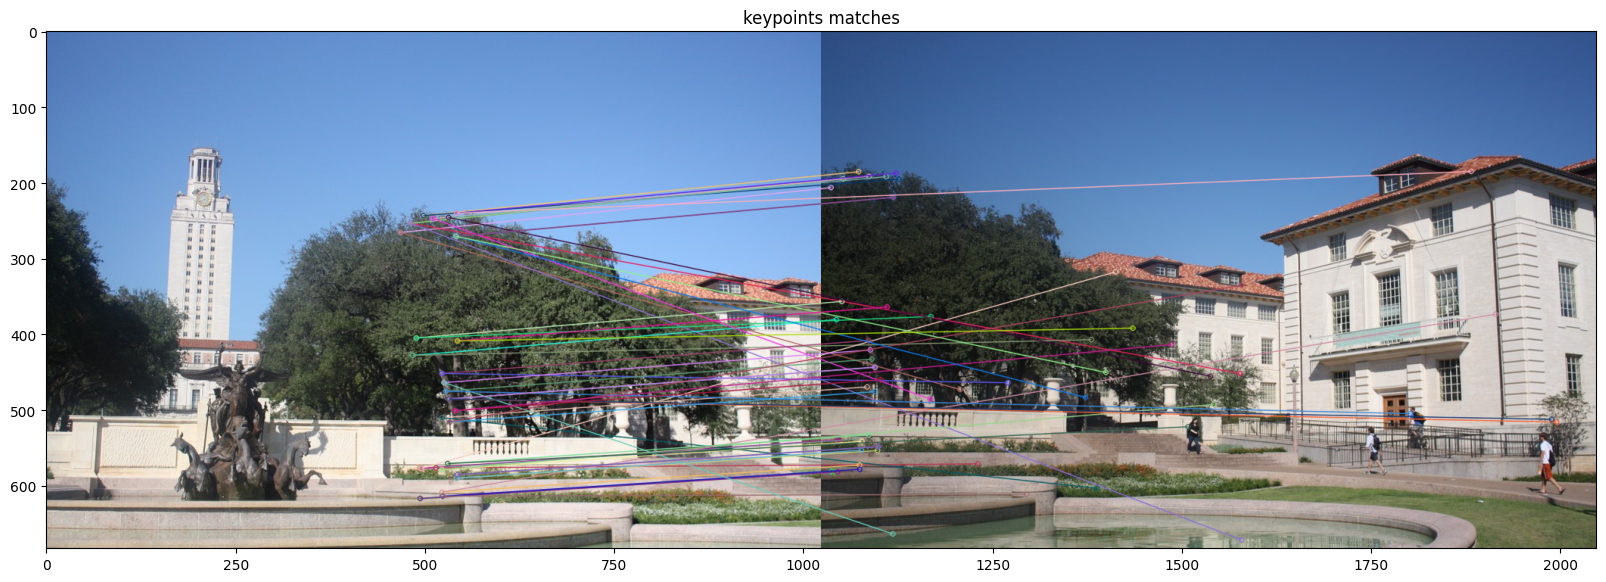

In [26]:
# Apply ratio test
good_and_second_good_match_list = []
for m in matches:
   if m[0].distance/m[1].distance < 0.5:
      good_and_second_good_match_list.append(m)
      good_match_arr = np.asarray(good_and_second_good_match_list)[:,0]
# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_r, kp_r,
good_and_second_good_match_list[0:30],
None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()